# NEEM Visualization
The NEEM Evaluator also provides tools to visualize the content of a NEEM. In particular it is possible to visualize the semantic events of the NEEM behaviour on a timeline. As well as the trajectory of different objects during the execution of the task.

## Visualize the semantic events 
To visualize the semantic events of the NEEM behaviour on a timeline, you need to create a Python Neem instance. This can either be from a serialized JSON file or from a NEEM loaded into Knowrob. In this example we will use the NEEM loaded into Knowrob.

[INFO] [1705332415.306088]: NEEM Object: NaturalPerson_CTYBCZBF has no tf_link_name therefore no tf pointer could be loaded
[INFO] [1705332415.364477]: NEEM Object: NaturalPerson_CTYBCZBF has no tf_link_name therefore no tf pointer could be loaded
[INFO] [1705332415.422668]: NEEM Object: NaturalPerson_CTYBCZBF has no tf_link_name therefore no tf pointer could be loaded
[INFO] [1705332415.448311]: NEEM Object: NaturalPerson_CTYBCZBF has no tf_link_name therefore no tf pointer could be loaded
[INFO] [1705332415.473849]: NEEM Object: NaturalPerson_CTYBCZBF has no tf_link_name therefore no tf pointer could be loaded
[INFO] [1705332415.497394]: NEEM Object: NaturalPerson_CTYBCZBF has no tf_link_name therefore no tf pointer could be loaded
[INFO] [1705332415.523453]: NEEM Object: NaturalPerson_CTYBCZBF has no tf_link_name therefore no tf pointer could be loaded
[INFO] [1705332415.570393]: NEEM Object: TopRightDirection_1 has no tf_link_name therefore no tf pointer could be loaded
[INFO] [170

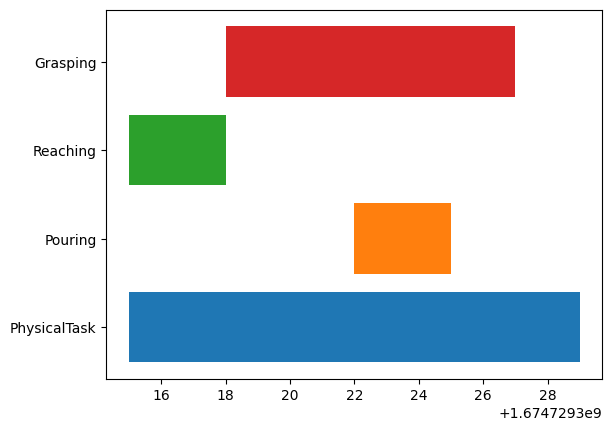

In [1]:
from neem_evaluator.neem import Neem
from neem_evaluator.events import plot_events
from neem_evaluator.knowrob import remember_neem

remember_neem("")

n = Neem()
plot_events(n)


## Visualize the trajectory of objects
Visualizing the trajectories is a little bit more complicated since you need to provide the TF generator of this object instead of the whole Neem. We will go through this step by step. First we start by creating a Python Neem instance from a NEEM loaded into Knowrob and get the object of which we want to visualize the trajectory.

In [1]:
from neem_evaluator.neem import Neem

n = Neem()

hand_object = n.get_objects_by_name("right_hand_1")


[INFO] [1705500333.368648]: NEEM Object: NaturalPerson_CTYBCZBF has no tf_link_name therefore no tf pointer could be loaded
[INFO] [1705500333.426558]: NEEM Object: NaturalPerson_CTYBCZBF has no tf_link_name therefore no tf pointer could be loaded
[INFO] [1705500333.484601]: NEEM Object: NaturalPerson_CTYBCZBF has no tf_link_name therefore no tf pointer could be loaded
[INFO] [1705500333.507748]: NEEM Object: NaturalPerson_CTYBCZBF has no tf_link_name therefore no tf pointer could be loaded
[INFO] [1705500333.530390]: NEEM Object: NaturalPerson_CTYBCZBF has no tf_link_name therefore no tf pointer could be loaded
[INFO] [1705500333.553928]: NEEM Object: NaturalPerson_CTYBCZBF has no tf_link_name therefore no tf pointer could be loaded
[INFO] [1705500333.578339]: NEEM Object: NaturalPerson_CTYBCZBF has no tf_link_name therefore no tf pointer could be loaded
[INFO] [1705500333.622372]: NEEM Object: TopRightDirection_1 has no tf_link_name therefore no tf pointer could be loaded
[INFO] [170

Next we need to create a simulation in which we can visualize the environment of the NEEM and the trajectory. Lastly, we get the tf generator from the hand object and pass it to the visualize_trajectory function of the simulation.

To move the camera around in the simulation hold `CTRL` and use the mouse buttons. If you want to change the camera position use `CTRL` and middle mouse button.

In [2]:
from neem_evaluator.bullet_world import BulletWorld, Object

world = BulletWorld()

apartment = Object("apartment", "Environment", "apartment.urdf")

world.visualize_trajectory(hand_object.get_tfs())

You can close the simulation with the cell below.

In [3]:
world.exit()

## Replay of Trajectories
You can also replay the trajetory. For this you need an object that should be used to replay the trajectory e.g. the hand if you want to replay the trajectory of the hand and the TF data of the trajectory to be replayed. 

Replaying is also done in the BulletWorld, so if you already have a BulletWorld running you can skip the next step and just use it. 

In [5]:
from neem_evaluator.bullet_world import BulletWorld, Object
from neem_evaluator.neem import Neem

n = Neem()

hand_object = n.get_objects_by_name("right_hand_1")

world = BulletWorld()

apartment = Object("apartment", "Environment", "apartment.urdf")
right_hand = Object("right_hand", "hand", "right_hand.stl")

world.visualize_trajectory(hand_object.get_tfs())

world.replay_trajectory(hand_object.get_tfs(), right_hand)

[INFO] [1705572692.285590]: NEEM Object: NaturalPerson_CTYBCZBF has no tf_link_name therefore no tf pointer could be loaded
[INFO] [1705572692.349137]: NEEM Object: NaturalPerson_CTYBCZBF has no tf_link_name therefore no tf pointer could be loaded
[INFO] [1705572692.409959]: NEEM Object: NaturalPerson_CTYBCZBF has no tf_link_name therefore no tf pointer could be loaded
[INFO] [1705572692.434293]: NEEM Object: NaturalPerson_CTYBCZBF has no tf_link_name therefore no tf pointer could be loaded
[INFO] [1705572692.458556]: NEEM Object: NaturalPerson_CTYBCZBF has no tf_link_name therefore no tf pointer could be loaded
[INFO] [1705572692.482285]: NEEM Object: NaturalPerson_CTYBCZBF has no tf_link_name therefore no tf pointer could be loaded
[INFO] [1705572692.507880]: NEEM Object: NaturalPerson_CTYBCZBF has no tf_link_name therefore no tf pointer could be loaded
[INFO] [1705572692.553482]: NEEM Object: TopRightDirection_1 has no tf_link_name therefore no tf pointer could be loaded
[INFO] [170

You can use the cell below to close the BulletWorld once you are finished. 

In [6]:
world.exit()